In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import interact, interactive, fixed


In [54]:
result_data_path_base = "./results/data/diecutting/"
fn = [
    # "beta=0.00_161016_190044.npz",
    # "beta=0.10_161016_190056.npz",
    # "beta=0.20_161016_190105.npz",
    # "beta=0.30_161016_190111.npz",
    # "beta=0.40_161016_190125.npz",
    # "beta=0.50_161016_190158.npz",
    # "beta=0.60_161016_190207.npz",
    # "beta=0.70_161016_190217.npz",
    # "beta=0.80_161016_190229.npz",
    # "beta=0.90_161016_190236.npz",
    # "beta=1.00_161016_190242.npz",
    # "beta=2.00_161016_195423.npz",
    # "beta=3.00_161016_195439.npz",
    # "beta=4.00_161016_195447.npz",
    # "beta=5.00_161016_195452.npz",
    # "beta=6.00_161016_195526.npz",
    # "beta=0.00_161111_132832.npz",
    # "beta=0.00_161111_141810.npz",  # <- beta = 0.001
    # "beta=1.00_161111_132834.npz",
    # "beta=2.00_161111_132842.npz",
    # "beta=3.00_161111_132849.npz",
    # "beta=4.00_161111_132858.npz",
    # "beta=5.00_161111_132907.npz",
    # "beta=6.00_161111_132916.npz",
    # "beta=0.00_161111_143949.npz",
    "beta=1.00_161111_144002.npz",
    "beta=2.00_161111_144011.npz",
    "beta=3.00_161111_144019.npz",
    "beta=4.00_161111_144025.npz",
    "beta=5.00_161111_144032.npz",
    "beta=6.00_161111_144038.npz",

]

<IPython.core.display.Javascript object>


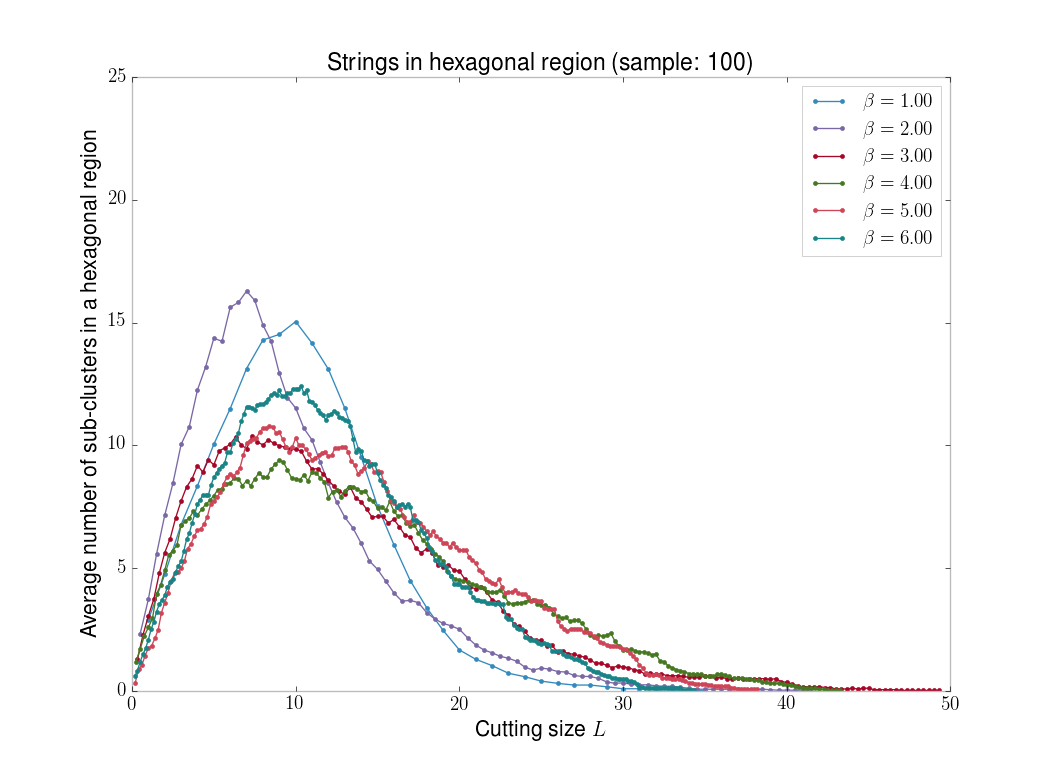

In [3]:
@interact(alpha=(0., 3., 0.05), gamma=(0., 3., 0.05))
def plot(alpha=1., gamma=1.):
    fig, ax = plt.subplots()
    for result_data_path in [result_data_path_base + f for f in fn]:
        data = np.load(result_data_path)
        beta = data['beta']
        num_of_strings = data['num_of_strings']
        L = data['L']
        frames = data['frames']
        Ls = data['Ls']
        N_sub = data['N_sub']

        # optimizer = Optimize_linear(
        #     args=(
        #         Ls[:-1],
        #         N_sub[:-1]
        #     ),
        #     parameters=[1.5, 0.]
        # )
        # result = optimizer.fitting()

        ax.plot(Ls / (beta ** alpha), N_sub * (beta ** gamma), '.-', label=r'$\beta = %2.2f$' % beta)
        # ax.plot(
        #     Ls[:-1],
        #     optimizer.fitted(Ls[:-1]),
        #     '-',
        #     label='a = %f' % result['a']
        # )
    ax.legend(loc='best')
    ax.set_ylim((0., 25.))
    ax.set_title('Strings in hexagonal region' +
                 ' (sample: {})'.format(num_of_strings))
    ax.set_xlabel(r'Cutting size $L$')
    ax.set_ylabel('Average number of sub-clusters in a hexagonal region')

    plt.show()

In [4]:
def plot2():
    fig, ax = plt.subplots()
    for result_data_path in [result_data_path_base + f for f in fn]:
        data = np.load(result_data_path)
        beta = data['beta']
        num_of_strings = data['num_of_strings']
        L = data['L']
        frames = data['frames']
        Ls = data['Ls']
        N_sub = data['N_sub']
        M = N_sub / (3 * Ls * (Ls + 1) + 1)
        
        # ax.plot(Ls, N_sub / np.sum(N_sub), '.-', label=r'$\beta = %2.2f$' % beta)
        ax.semilogy(Ls, M / np.sum(M), '.-', label=r'$\beta = %2.2f$' % beta)
    ax.legend(loc='best')
    ax.set_ylim((0., 0.3))
    ax.set_title('Strings in hexagonal region' +
                 ' (sample: {})'.format(num_of_strings))
    ax.set_xlabel(r'Cutting size $L$')
    ax.set_ylabel('Appearance frequency of sub-clusters of the size L in a hexagonal region')

    plt.show()

<IPython.core.display.Javascript object>


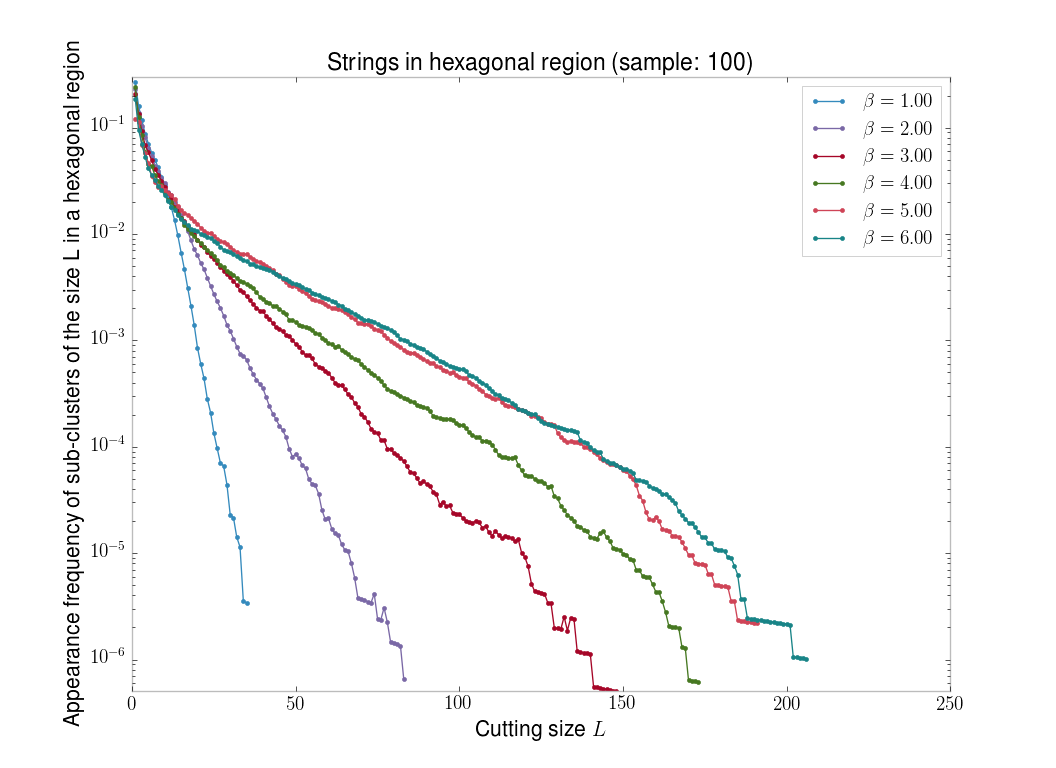

In [5]:
plot2()

In [6]:
from scipy.optimize import curve_fit
from scipy.stats import gamma

In [ ]:
def E

In [52]:
def plot_and_optimize():
    fig, ax = plt.subplots()
    for result_data_path in [result_data_path_base + f for f in fn]:
        data = np.load(result_data_path)
        beta = data['beta']
        num_of_strings = data['num_of_strings']
        L = data['L']
        frames = data['frames']
        Ls = data['Ls']
        N_sub = data['N_sub']
        # M = N_sub / (3 * Ls * (Ls + 1) + 1)
        M = N_sub
        M_ave = M / np.sum(M)
        popt = curve_fit(gamma.pdf, xdata=Ls, ydata=M_ave, p0=[2.5, -5., 30])[0]
        print popt
        ax.plot(Ls, M_ave, '.-', label=r'$\beta = %2.2f$' % beta)
        ax.plot(Ls, gamma.pdf(Ls, a=popt[0], loc=popt[1], scale=popt[2]), '-', label=r'fitted $\beta = %2.2f$' % beta)

    ax.legend(loc='best')
    ax.set_ylim((0., 0.1))
    ax.set_title('Strings in hexagonal region' +
                 ' (sample: {})'.format(num_of_strings))
    ax.set_xlabel(r'Cutting size $L$')
    ax.set_ylabel('Appearance frequency of sub-clusters of the size L in a hexagonal region')

    plt.show()

<IPython.core.display.Javascript object>


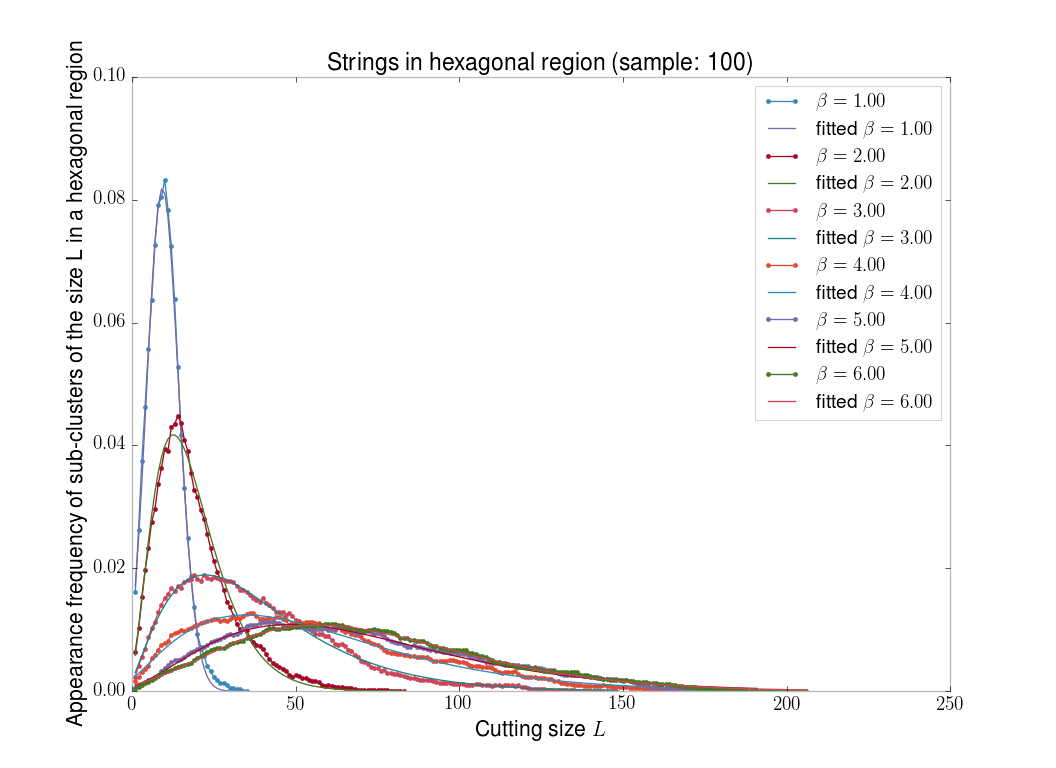

[ 252.35632305  -67.94752387    0.30727421]
[ 3.5082685  -2.01394213  5.83637321]
[  2.48931408  -1.95393277  16.35327997]
[  2.76973524  -6.01948686  23.08560066]
[  3.52770572  -8.04957253  22.35988754]
[  6.23262851 -26.73830739  15.96456171]


In [55]:
plot_and_optimize()